# Judul: Prediksi Harga Properti dengan Model Advanced

In [30]:
import pandas as pd
import numpy as np

# Parameter dataset
np.random.seed(42)
num_samples = 1000

# Fitur dataset
lokasi = np.random.choice(['Kota Padang', 'Kota Jambi', 'Kota Dumai'], size=num_samples)
luas_bangunan = np.random.uniform(50, 300, size=num_samples)
jumlah_kamar = np.random.randint(1, 6, size=num_samples)
fasilitas = np.random.randint(0, 4, size=num_samples)

# Harga properti (target) - fungsi kombinasi
harga = (
    luas_bangunan * 3  # kontribusi luas bangunan
    + jumlah_kamar * 50  # kontribusi jumlah kamar
    + fasilitas * 20  # kontribusi fasilitas
    + np.random.normal(0, 20, size=num_samples)  # noise
)

# Membuat DataFrame
df = pd.DataFrame({
    'Lokasi': lokasi,
    'Luas_Bangunan': luas_bangunan,
    'Jumlah_Kamar': jumlah_kamar,
    'Fasilitas': fasilitas,
    'Harga_Properti': harga
})

# Menyimpan dataset
df.to_csv('../data/dataset_harga_properti.csv', index=False)
print("Dataset berhasil dibuat dan disimpan.")


Dataset berhasil dibuat dan disimpan.


In [31]:
# Membaca dataset
df = pd.read_csv('../data/dataset_harga_properti.csv')

# Informasi awal tentang dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lokasi          1000 non-null   object 
 1   Luas_Bangunan   1000 non-null   float64
 2   Jumlah_Kamar    1000 non-null   int64  
 3   Fasilitas       1000 non-null   int64  
 4   Harga_Properti  1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB
None
       Luas_Bangunan  Jumlah_Kamar    Fasilitas  Harga_Properti
count    1000.000000   1000.000000  1000.000000     1000.000000
mean      175.809888      3.068000     1.487000      710.574175
std        72.709452      1.422462     1.131862      233.601037
min        51.158006      1.000000     0.000000      219.610541
25%       109.657139      2.000000     0.000000      512.461439
50%       178.909432      3.000000     1.500000      711.002900
75%       237.662378      4.000000     3.000000      890.773132


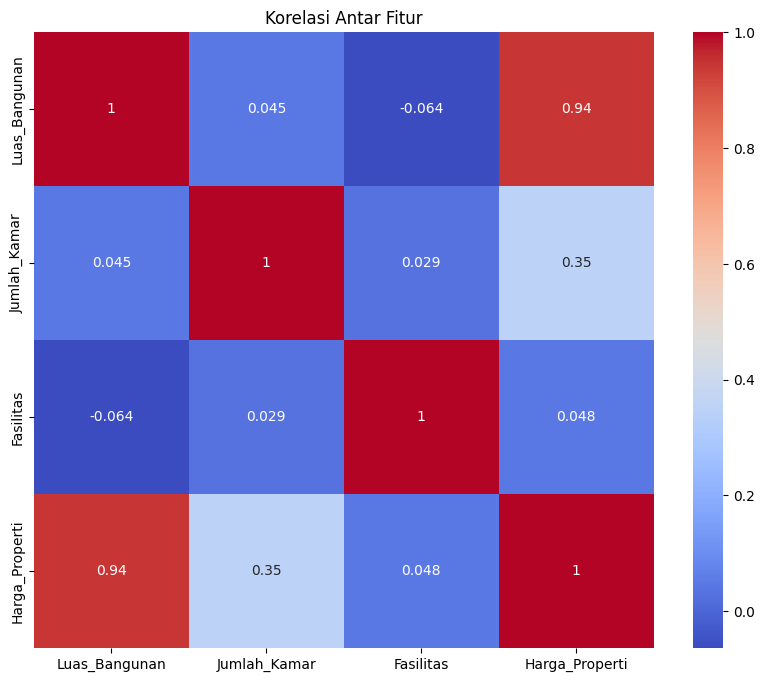

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Periksa jika ada NaN dan tangani (opsional, misalnya dengan mengganti NaN dengan 0)
df_numeric = df_numeric.fillna(0)

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()


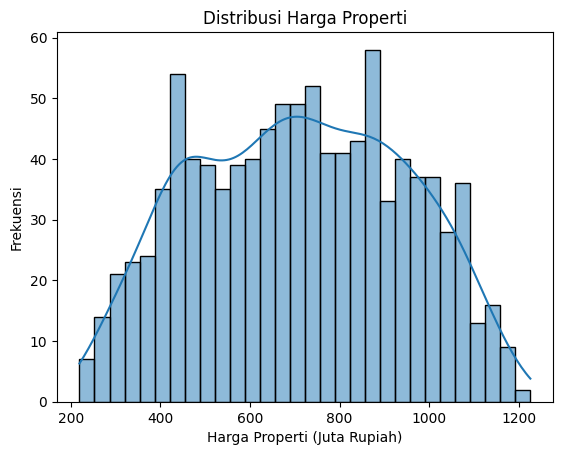

In [33]:
# Distribusi harga properti
sns.histplot(df['Harga_Properti'], kde=True, bins=30)
plt.title("Distribusi Harga Properti")
plt.xlabel("Harga Properti (Juta Rupiah)")
plt.ylabel("Frekuensi")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label encoding untuk kolom kategori
le = LabelEncoder()
df['Lokasi'] = le.fit_transform(df['Lokasi'])  # Kota Padang=0, Kota Jambi=1, Kota Dumai=2

# Fitur dan target
X = df.drop(columns=['Harga_Properti'])
y = df['Harga_Properti']

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Prediksi
y_pred_gb = gb_model.predict(X_test)

# Evaluasi model
print("Gradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))


Gradient Boosting:
MAE: 18.74845688508028
MSE: 536.7181545778562
R2 Score: 0.9894190194965998


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Melatih model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluasi
y_pred_nn = nn_model.predict(X_test)
print("Neural Network:")
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("R2 Score:", r2_score(y_test, y_pred_nn))


Epoch 1/50


c:\Users\GF63-1039\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 551662.3750 - mae: 701.8248 - val_loss: 568541.1250 - val_mae: 716.6047
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 545925.8750 - mae: 701.6032 - val_loss: 566880.6250 - val_mae: 715.4865
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 537967.1250 - mae: 691.5604 - val_loss: 564328.5625 - val_mae: 713.7822
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 542662.5000 - mae: 697.1679 - val_loss: 560340.0000 - val_mae: 711.1356
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 543316.6250 - mae: 698.0710 - val_loss: 554211.8750 - val_mae: 707.0887
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 519514.0000 - mae: 682.0158 - val_loss: 545305.0625 - val_mae: 701.2102
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 527483.3125 - mae: 687.2201 - val_loss: 532826.6250 - val_mae: 692.9843
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 518864.5312 - mae: 681.4375 - val_loss: 51

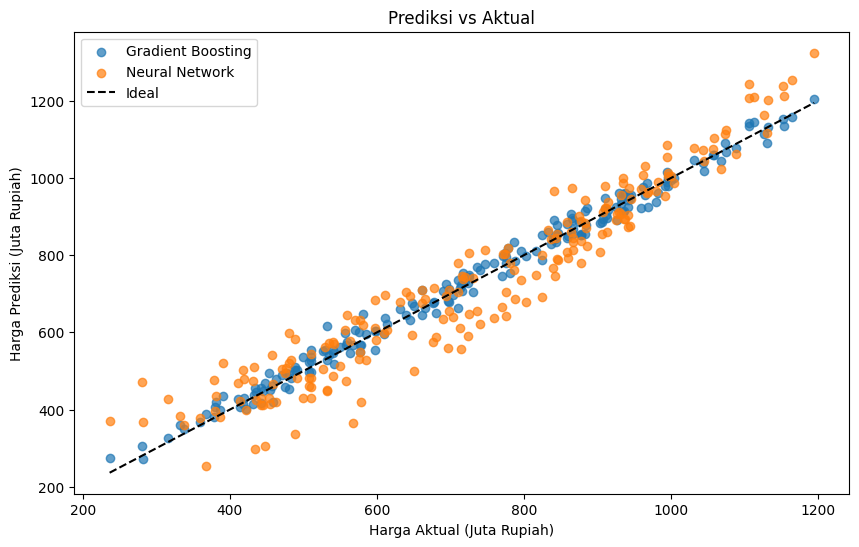

In [37]:
# Perbandingan prediksi vs aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7, label="Gradient Boosting")
plt.scatter(y_test, y_pred_nn, alpha=0.7, label="Neural Network")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label="Ideal")
plt.title("Prediksi vs Aktual")
plt.xlabel("Harga Aktual (Juta Rupiah)")
plt.ylabel("Harga Prediksi (Juta Rupiah)")
plt.legend()
plt.show()
